# Module 1 - Peer reviewed

### Outline:
In this homework assignment, there are four objectives. 

1. To assess your knowledge of ANOVA/ANCOVA models
2. To apply your understanding of these models to a real-world datasets

General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what you are attempting to explain or answer.

In [25]:
# Load Required Packages
library(tidyverse)
library(ggplot2)
library(plyr)
library(dplyr)

### Problem #1: Simulate ANCOVA Interactions

In this problem, we will work up to analyzing the following model to show how interaction terms work in an ANCOVA model.

$$Y_i = \beta_0 + \beta_1 X + \beta_2 Z + \beta_3XZ + \varepsilon_i$$

This question is designed to enrich understanding of interactions in ANCOVA models. There is no additional coding required for this question, however we recommend messing around with the coefficents and plot as you see fit. Ultimately, this problem is graded based on written responses to questions asked in part **(a)** and **(b)**.

To demonstrate how interaction terms work in an ANCOVA model, let's generate some data. First, we consider the model 

$$Y_i = \beta_0 + \beta_1 X + \beta_2 Z + \varepsilon_i$$

where $X$ is a continuous covariate, $Z$ is a dummy variable coding the levels of a two level factor, and $\varepsilon_i \overset{iid}{\sim} N(0,\sigma^2)$. We choose values for the parameters below (b0,...,b2). 

,x,z,y
,<dbl>,<fct>,<dbl>
1,0.09159879,1,6.290179
2,1.96439135,1,10.168612
3,0.57805656,1,7.200027
4,0.03370108,0,1.289331
5,1.82614045,0,4.470862
6,0.71220319,0,2.485743


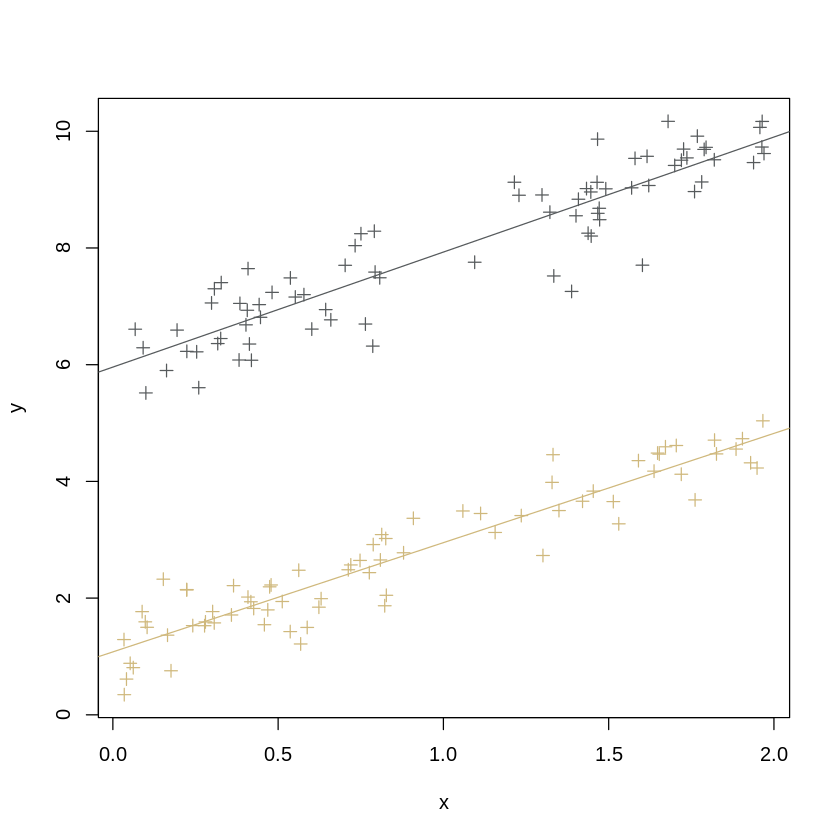

In [26]:
rm(list = ls())
set.seed(99)

#simulate data
n = 150
# choose these betas
b0 = 1; b1 = 2; b2 = 5; eps = rnorm(n, 0, 0.5);
x = runif(n,0,2); z = runif(n,-2,2);
z = ifelse(z > 0,1,0); 
# create the model:
y = b0 + b1*x + b2*z + eps
df = data.frame(x = x,z = as.factor(z),y = y)
head(df)

#plot separate regression lines
with(df, plot(x,y, pch = 3, col = c("#CFB87C","#565A5C")[z]))
abline(coef(lm(y[z == 0] ~ x[z == 0], data = df)), col = "#CFB87C")
abline(coef(lm(y[z == 1] ~ x[z == 1], data = df)), col = "#565A5C")

#### 1. (a) What happens with the slope and intercept of each of these lines?

In this case, we can think about having two separate regression lines--one for $Y$ against $X$ when the unit is in group $Z = 0$ and another for $Y$ against $X$ when the unit is in group $Z = 1$. What do we notice about the slope of each of these lines?

`geom_smooth()` using formula 'y ~ x'



,2.5 %,97.5 %
(Intercept),0.8799495,1.190004
x,1.7962359,2.049630
z1,4.8188886,5.129859


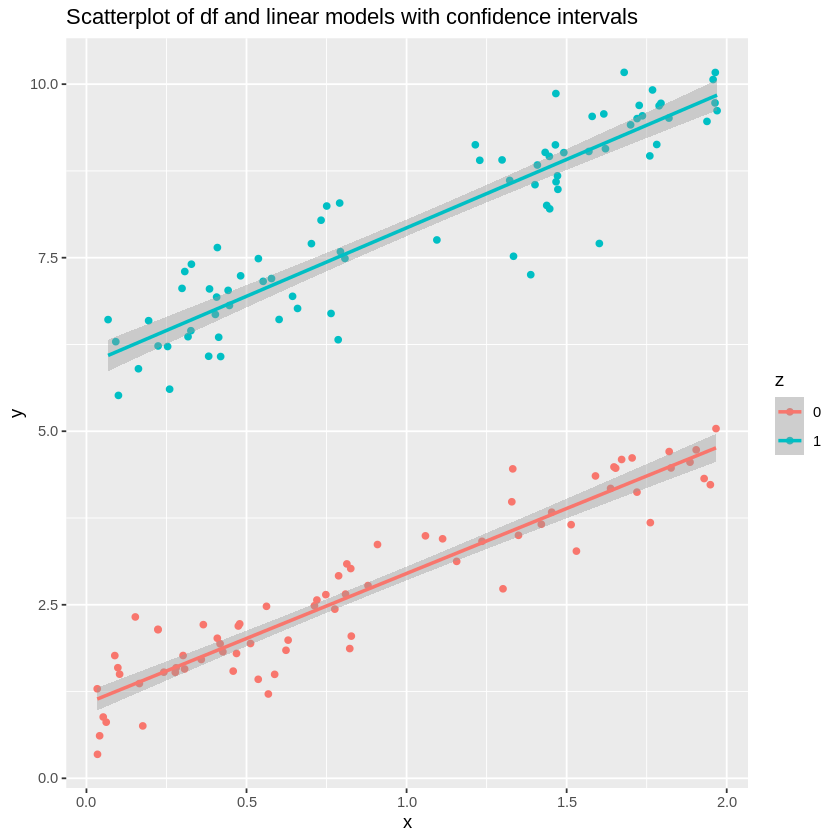

In [27]:
df %>%
    ggplot(aes(y = y, x = x, color = z)) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE) +
    labs(title = "Scatterplot of df and linear models with confidence intervals")

confint(lm(y ~ x + z, data = df), level = 0.95)

# My Comments:

I have outputted a GGPlot with confidence intervals for the ANCOVA model slopes, along with the confidence intervals for each of the $\hat{\beta}_i$'s. Note that the GGPlot has an implicit interaction term and so the plot is slightly innacurate for this question - I use it for a visual aid, but will refer to the standard plot included in the prompt. The regression slopes are identical for both models because we forced them be in the model. The slopes are positive in x, implying that as the continuous predictor x increases, so too does the response y. The intercepts of each regression model are different; the factor z has a significant effect on the predictor y as well as x. The $95\%$ confidence intervals confirm this.

#### 1. (b)  Now, let's add the interaction term (let $\beta_3 = 3$). What happens to the slopes of each line now?

The model now is of the form:

$$Y_i = \beta_0 + \beta_1 X + \beta_2 Z + \beta_3XZ + \varepsilon_i$$

where $X$ is a continuous covariate, $Z$ is a dummy variable coding the levels of a two level factor, and $\varepsilon_i \overset{iid}{\sim} N(0,\sigma^2)$. We choose values for the parameters below (b0,...,b3). 

,x,z,y
,<dbl>,<fct>,<dbl>
1,0.09159879,1,6.564975
2,1.96439135,1,16.061786
3,0.57805656,1,8.934197
4,0.03370108,0,1.289331
5,1.82614045,0,4.470862
6,0.71220319,0,2.485743


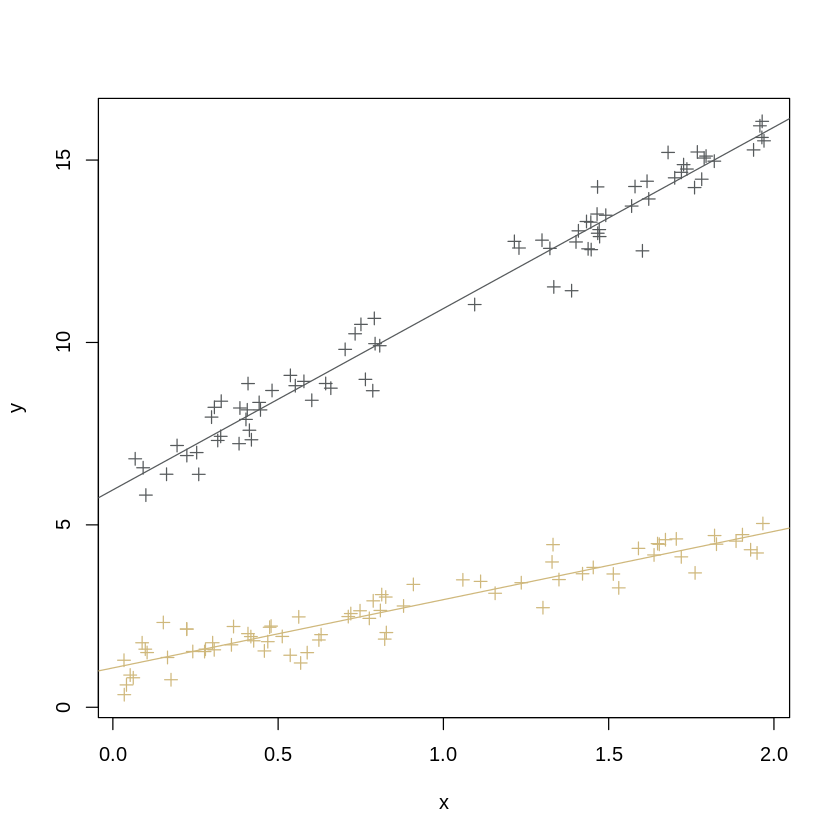

In [28]:
#simulate data
set.seed(99)
n = 150
# pick the betas
b0 = 1; b1 = 2; b2 = 5; b3 = 3; eps = rnorm(n, 0, 0.5); 

#create the model
y = b0 + b1*x + b2*z + b3*(x*z) + eps
df = data.frame(x = x,z = as.factor(z),y = y)
head(df)

lmod = lm(y ~ x + z, data = df)
lmodz0 = lm(y[z == 0] ~ x[z == 0], data = df)
lmodz1 = lm(y[z == 1] ~ x[z == 1], data = df)
# summary(lmod)
# summary(lmodz0)
# summary(lmodz1)

# lmodInt = lm(y ~ x + z + x*z, data = df)
# summary(lmodInt)

#plot separate regression lines
with(df, plot(x,y, pch = 3, col = c("#CFB87C","#565A5C")[z]))
abline(coef(lm(y[z == 0] ~ x[z == 0], data = df)), col = "#CFB87C")
abline(coef(lm(y[z == 1] ~ x[z == 1], data = df)), col = "#565A5C")

In this case, we can think about having two separate regression lines--one for $Y$ against $X$ when the unit is in group $Z = 0$ and another for $Y$ against $X$ when the unit is in group $Z = 1$. **What do you notice about the slope of each of these lines?**

`geom_smooth()` using formula 'y ~ x'



,2.5 %,97.5 %
(Intercept),0.8872579,1.269815
x,1.6907978,2.053849
z1,4.5936960,5.167273
x:z1,2.8451277,3.352780


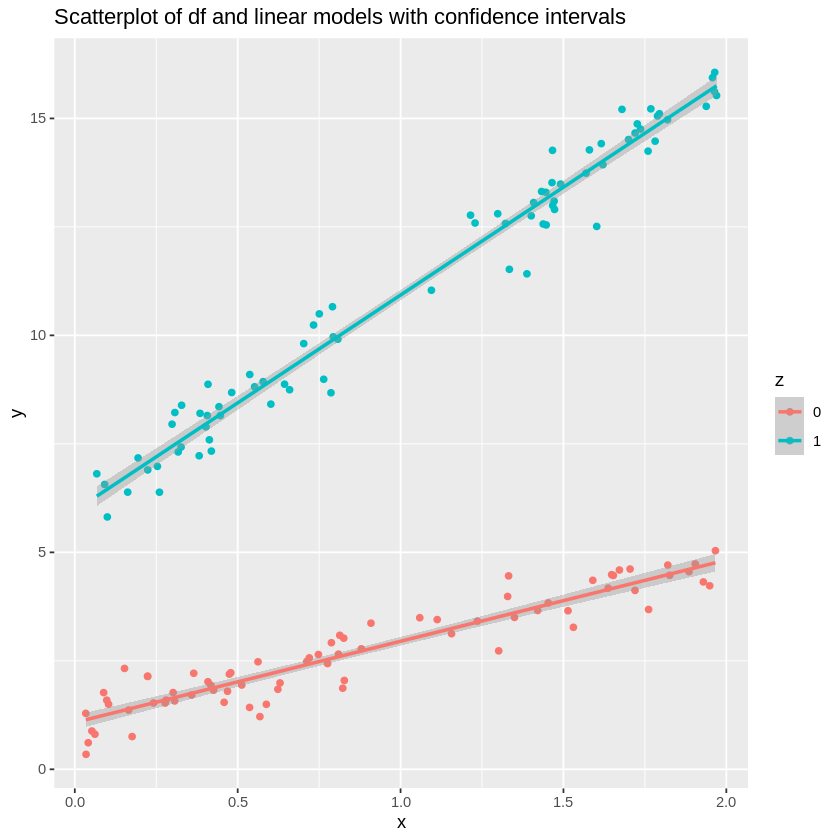

In [29]:
df %>%
    ggplot(aes(y = y, x = x, color = z)) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE) +
    labs(title = "Scatterplot of df and linear models with confidence intervals")

confint(lm(y ~ x + z + x:z, data = df), level = 0.95)

# My Comments:

In this dataset, there is a statistically significant interaction between the factor and the continuous predictor x. This is shown in the confidence interval I output above, and manifests graphically as the two lines having different slopes (they are not parallel). To be specific, the least squares estimator $\hat{\beta}_3$ for the interaction term has a confidence interval $(2.8451277, 3.352780)$. This does not include zero, and we can therefore conclude at the $\alpha = 0.05$ level that there is a nonzero correlation between x and z.


---


## Problem #2

In this question, we ask you to analyze the ```mtcars``` dataset. The goal if this question will be to try to explain the variability in miles per gallon (mpg) using transmission type (am), while adjusting for horsepower (hp).

To load the data, use ```data(mtcars)```

#### 2. (a) Rename the levels of am from 0 and 1 to "Automatic" and "Manual" (one option for this is to use the revalue() function in the plyr package). Then, create a boxplot (or violin plot) of mpg against am. What do you notice? Comment on the plot

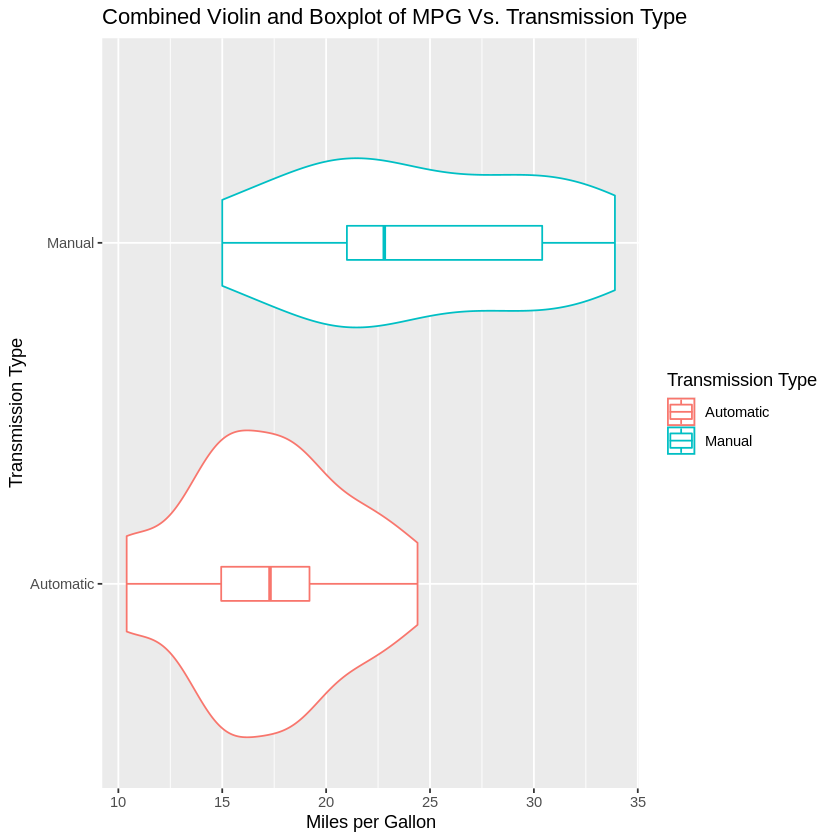

In [47]:
data(mtcars)

# your code here
newam <- mtcars %>%
            pull(am) %>%
                factor() %>%
                    revalue(replace = c("0" = "Automatic", "1" = "Manual"))

mtcars$am <- newam

mtcars %>%
    ggplot(aes(x = mpg, y = am, color = am)) + 
    geom_violin() +
    geom_boxplot(width = .1) + 
    labs(x = "Miles per Gallon", y = "Transmission Type", color = "Transmission Type", title = "Combined Violin and Boxplot of MPG Vs. Transmission Type")

# My Comments:

I superimposed boxplots onto violin plots because I think it provides better context into the data. Every element of the IQR for manual transmissions has a higher MPG value than any given element of the IQR for automatic transmissions. It is thus practically safe to say that, all else being equal, a given car will be more fuel efficient with a manual transmission than with a automatic transmission. The difference is quite large - the difference in medians is approximately 5 miles per gallon. There is some overlap in fuel efficiency, and so upon creating linear models we would expect some residuals of one model to pass through the fitted values of the other.. 

#### 2. (b) Calculate the mean difference in mpg for the Automatic group compared to the Manual group. 

In [50]:
# your code here
AutoMeanMPG <- mtcars %>% 
                filter(am == "Automatic") %>% 
                    pull(mpg) %>%
                        mean()

ManualMeanMPG <- mtcars %>% 
                    filter(am == "Manual") %>% 
                        pull(mpg) %>%
                            mean()

AutoMeanMPG - ManualMeanMPG

[1] -7.244939

# My Comments:

The difference in mean MPG between Automatic and Manual transmissions in the mtcars dataset was approximately $-7.24$ miles per gallon. This means that the average automatic transmission car got $7.24$ miles per gallon fewer than the average manual transmission car.

#### 2. (c) Construct three models: 

1. An ANOVA model that checks for differences in mean mpg across different transmission types. 
2. An ANCOVA model that checks for differences in mean mpg across different transmission types, adjusting for horsepower.
3. An ANCOVA model that checks for differences in mean mpg across different transmission types, adjusting for horsepower and for interaction effects between horsepower and transmission type.

**Using these three models, determine whether or not the interaction term between transmission type and horsepower is significant.**


Call:
lm(formula = mpg ~ am, data = mtcars)

Coefficients:
(Intercept)     amManual  
     17.147        7.245  



Call:
lm(formula = mpg ~ am + hp, data = mtcars)

Coefficients:
(Intercept)     amManual           hp  
   26.58491      5.27709     -0.05889  



Call:
lm(formula = mpg ~ am + hp + am:hp, data = mtcars)

Coefficients:
(Intercept)     amManual           hp  amManual:hp  
 26.6248479    5.2176534   -0.0591370    0.0004029  


,2.5 %,97.5 %
(Intercept),22.15329144,31.09640430
amManual,-0.24154237,10.67684913
hp,-0.08565332,-0.03262064
amManual:hp,-0.03331435,0.03412013


`geom_smooth()` using formula 'y ~ x'



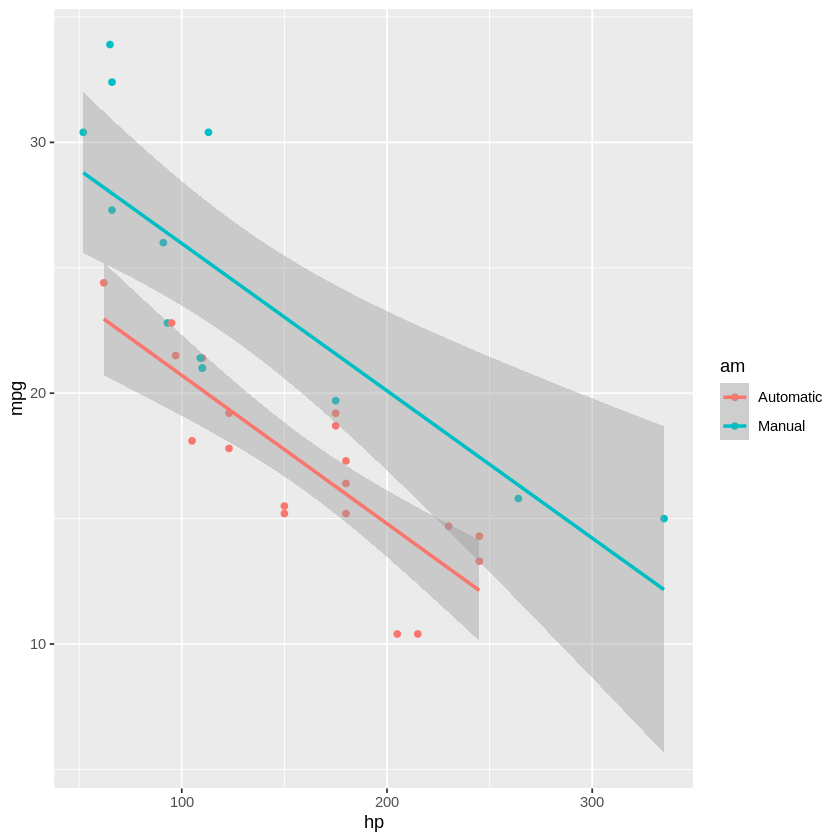

In [55]:
# your code here

anovaMod <- lm(mpg ~ am, data = mtcars)
ancovaNoInt <- lm(mpg ~ am + hp, data = mtcars)
ancovaWithInt <- lm(mpg ~ am + hp + am:hp, data = mtcars)

anovaMod ; ancovaNoInt ; ancovaWithInt

confint(ancovaWithInt, level = 0.95)

mtcars %>%
    ggplot(aes(x = hp, y = mpg, color = am)) + 
    geom_point() + 
    geom_smooth(method = "lm", se = TRUE)

# My Comments:

I outputted both the three required models, and $95\%$ confidence intervals for each of the $\hat{\beta}_i$'s for the ANCOVA model with an interaction term. The confidence interval for $\hat{\beta}_3$ - which is corresponds to the interaction term - includes zero, and therefore we do not have statistical evidence at the $\alpha = 0.05$ level that transmission type is correlated with horsepower in the model. This manifests in the above plot as the linear models being adjustable with their respective confidence intervals (the gray regions) to become parallel.

#### 2. (d) Construct a plot of mpg against horsepower, and color points based in transmission type. Then, overlay the regression lines with the interaction term, and the lines without. How are these lines consistent with your answer in (b) and (c)?

In [62]:
ancovaNoInt$coefficients
ancovaNoInt$coefficients[[2]] + ancovaNoInt$coefficients[[1]]

(Intercept)    amManual          hp 
 26.5849137   5.2770853  -0.0588878

[1] 31.862

`geom_smooth()` using formula 'y ~ x'



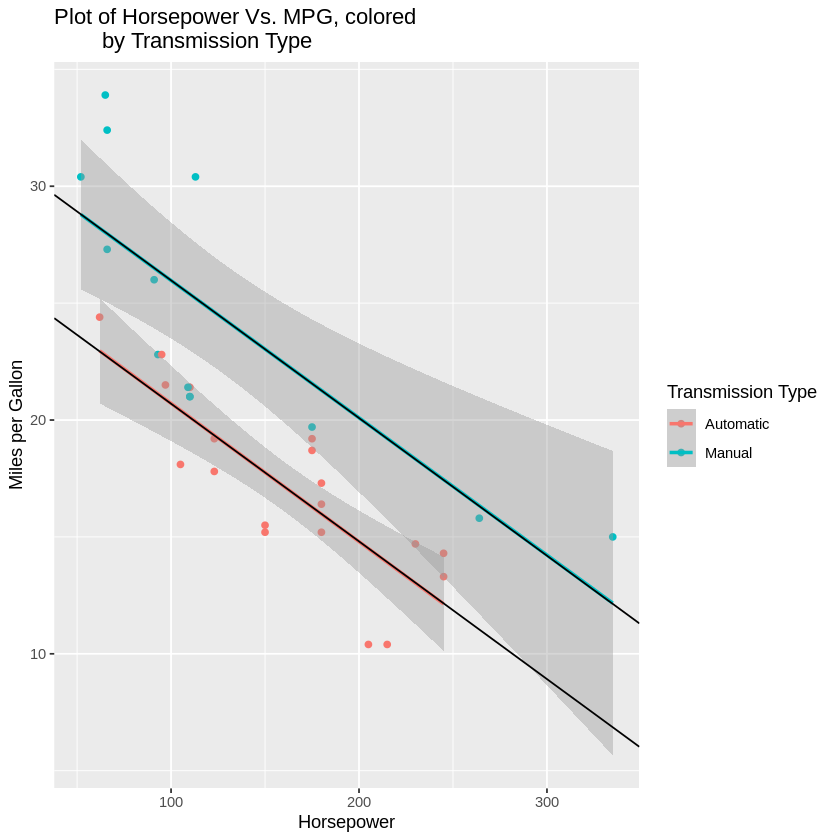

In [63]:
# your code here
autoBeta0 <- ancovaNoInt$coefficients[[1]]
manualBeta0 <- ancovaNoInt$coefficients[[1]] + ancovaNoInt$coefficients[[2]]
Beta1 <- ancovaNoInt$coefficients[[3]]

mtcars %>%
    ggplot(aes(x = hp, y = mpg, color = am)) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE) + 
    geom_abline(intercept = autoBeta0, slope = Beta1, color = "black") + 
    geom_abline(intercept = manualBeta0, slope = Beta1, color = "black") +
    labs(x = "Horsepower", y = "Miles per Gallon", color = "Transmission Type", title = "Plot of Horsepower Vs. MPG, colored
        by Transmission Type")

# My Comments:

I have superimposed the slopes with interactions between horsepower and transmission type as black lines onto the above ggplot. The black lines are almost perfectly parallel, and so there is no evidence that horsepower is correlated to transmission type. This agrees with our answer for part (c). The slopes and intercepts of the black lines don't tell us much about the mean values of MPG, other than the sample mean for each group must be somewhere within the plotted range of the models. That said, the fitted values for the manual transmission are ALWAYS gerater than the fitted values for automatic transmissions, which tells us that on average for any value of horsepower the manual car is expected to have a higher mpg.

Below I have included an example plot using simulated data that shows the geom_smooth(method = "lm") function automatically assumes an ANCOVA model with interactions. This means that for the mtcars plot, the colored and black linear models being so tight about each other is excellent evidence that the correlations between horsepower and transmission type are zero.

`geom_smooth()` using formula 'y ~ x'



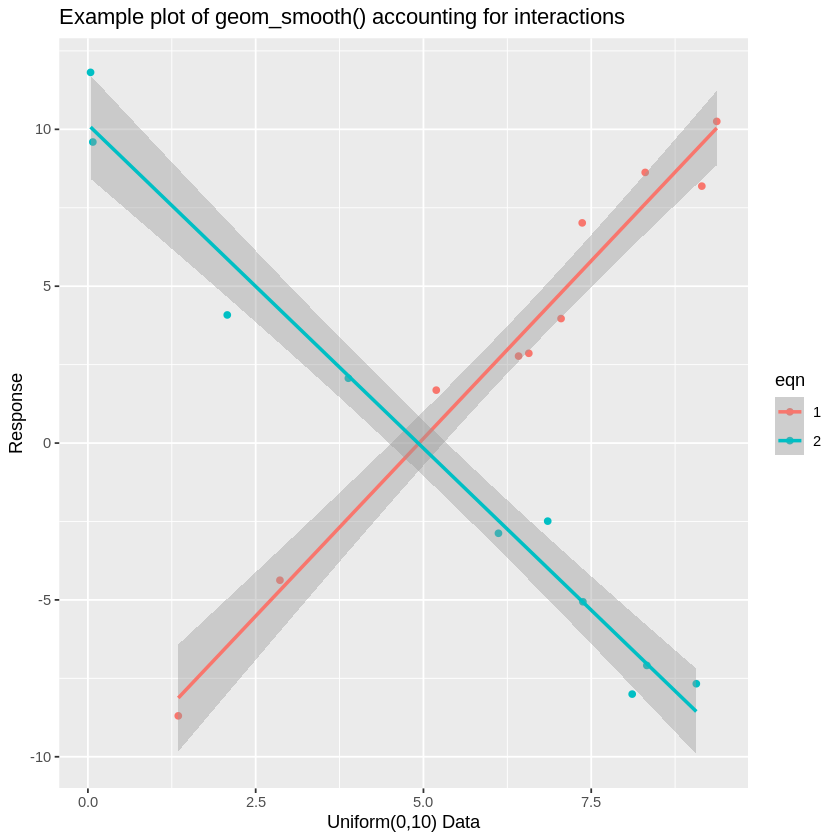

In [75]:
set.seed(42)
n <- 10
#Formula1 : y = -10 + 2x + rnorm(1, mean = 0, sd = 1)
xvals1 <- runif(n, min = 0, max = 10)
yvals1 <- -10 + 2 * xvals1 + rnorm(n, mean = 0, sd = 1)
data1 <- data.frame(xvals1, yvals1, eqn = 1)
names(data1) <- c("x", "y", "eqn")

#Formula2 : y = 10 - 2x + " "
xvals2 <- runif(n, min = 0, max = 10)
yvals2 <- 10 - 2 * xvals2 + rnorm(n)
data2 <- data.frame(xvals2, yvals2, eqn = 2)
names(data2) <- c("x", "y", "eqn")

df <- rbind(data1, data2)

df %>%
    mutate(eqn = as.factor(df$eqn)) %>%
        ggplot(aes(x = x, y = y, color = eqn)) +
        geom_point() +
        geom_smooth(method = "lm", se = TRUE) +
        labs(x = "Uniform(0,10) Data", y = "Response", title = "Example plot of geom_smooth() accounting for interactions")
